This script analyzes the variations in the acceleration due to gravity with altitude.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

use_errors = False

In [21]:
def fitfunction(x,a,b):
    return a*np.exp(b*np.array(x))

In [22]:
altitude = []
gravity = []

In [23]:
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        gravity.append(float(data[2]))

In [24]:
if use_errors == True:
    # create a list to hold the uncertainty in the density  
    gravity_uncertainty = [0.01,0.01,0.01,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.0001,0.0001,0.0001,0.00001,0.00001,0.000001,0.0000001,0.0000001]
else:
    gravity_uncertainty = [0.0]*len(gravity)
    
gravity_uncertainty = np.array(gravity_uncertainty)

Text(0, 0.5, 'Gravitational Acceleration (m/s^2)')

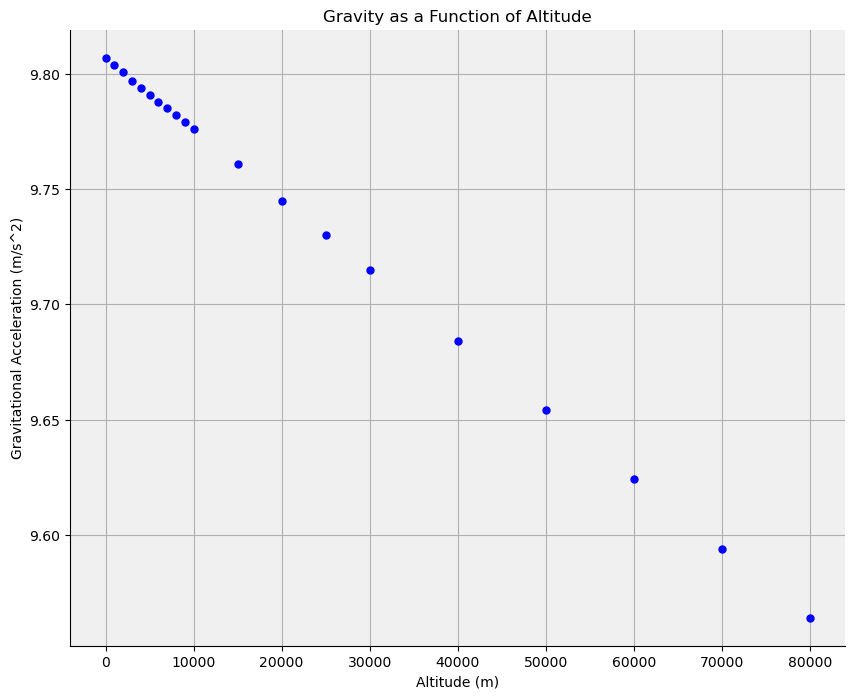

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

if use_errors == True:
    plt.errorbar(altitude, gravity, yerr=gravity_uncertainty, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)
else:
    plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravitational Acceleration (m/s^2)")

In [26]:
from scipy.optimize import curve_fit

init_vals = [12.0,-0.0001]


if use_errors == False:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)


print (popt)
print (pcov)

[ 9.80661109e+00 -3.13369231e-07]
[[ 8.37873627e-09 -1.77980069e-14]
 [-1.77980069e-14  8.29153502e-20]]


In [27]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(altitude[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 1.618E-06 / 18


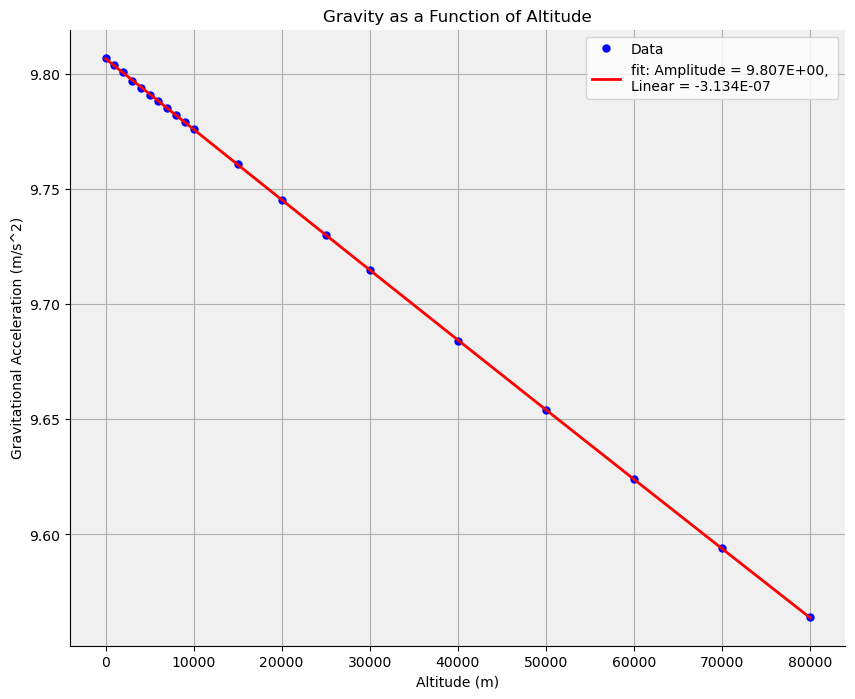

In [28]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))


# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravitational Acceleration (m/s^2)")
#plt.yscale("log")
plt.legend()

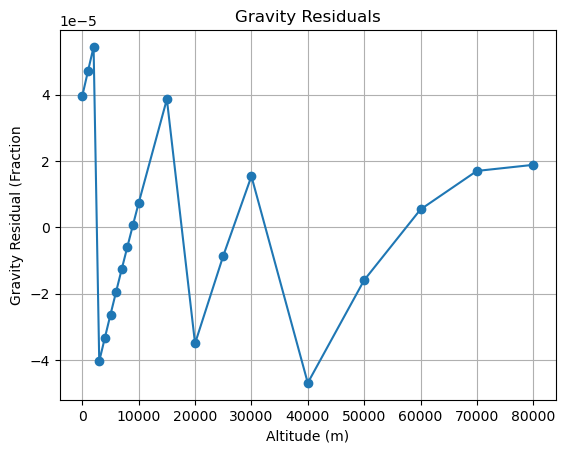

In [29]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residual (Fraction')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt))/gravity, 'o-')

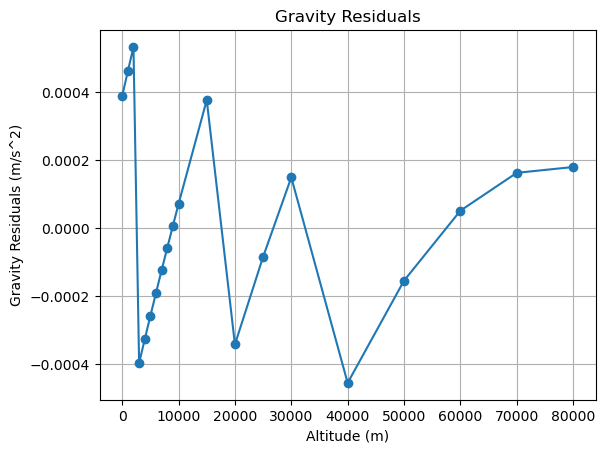

In [30]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt)), 'o-')
residuals = (gravity - fitfunction(altitude, *popt))
popt_exponential = popt

In [31]:
init_vals = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

def residualfunction(x,a,b,c,d,e,f,g,h):
    return a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)

In [32]:
if use_errors == False:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, p0=init_vals)
else:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

In [33]:
print (popt, pcov)

[ 5.33478213e-04 -2.98844331e-07  4.44548234e-11 -2.75411759e-15
  8.44644838e-20 -1.36561486e-24  1.11974234e-29 -3.67644702e-35] [[ 4.66205555e-08 -2.24019083e-11  3.34974959e-15 -2.19104769e-19
   7.25423411e-24 -1.27088684e-28  1.12290410e-33 -3.93692394e-39]
 [-2.24019083e-11  1.69152640e-14 -3.02138556e-18  2.15612658e-22
  -7.50816599e-27  1.35892678e-31 -1.22812103e-36  4.37730021e-42]
 [ 3.34974959e-15 -3.02138556e-18  5.87452092e-22 -4.38731901e-26
   1.57180051e-30 -2.90072276e-35  2.65877748e-40 -9.57807372e-46]
 [-2.19104769e-19  2.15612658e-22 -4.38731901e-26  3.37262679e-30
  -1.23308241e-34  2.31019045e-39 -2.14213090e-44  7.78734290e-50]
 [ 7.25423411e-24 -7.50816599e-27  1.57180051e-30 -1.23308241e-34
   4.57847635e-39 -8.68155016e-44  8.12703806e-49 -2.97715797e-54]
 [-1.27088684e-28  1.35892678e-31 -2.90072276e-35  2.31019045e-39
  -8.68155016e-44  1.66212111e-48 -1.56814252e-53  5.78122508e-59]
 [ 1.12290410e-33 -1.22812103e-36  2.65877748e-40 -2.14213090e-44
   8.

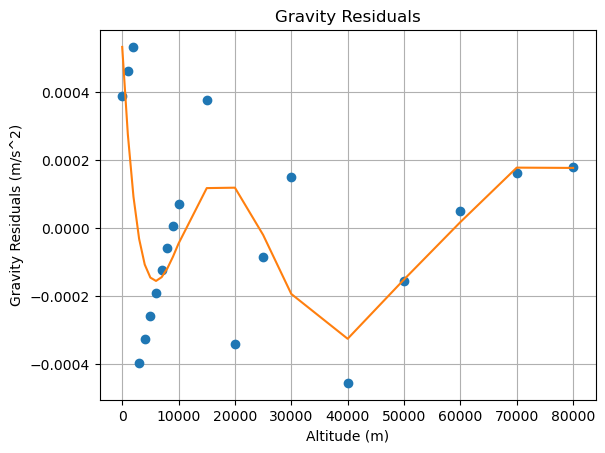

In [34]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)


plt.plot(altitude, residuals, 'o')
plt.plot(altitude, residualfunction(altitude, *popt), '-')

In [35]:
popt_combined = [popt_exponential[0], popt_exponential[1], popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7]]

In [36]:
def fitfunction_combined(x,a0,a1,a,b,c,d,e,f,g,h):
    return a0*np.exp(a1*np.array(x))+a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)

In [37]:
init_vals = popt_combined
if use_errors == False:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

Chi^2 / dof = 8.901E-07 / 10


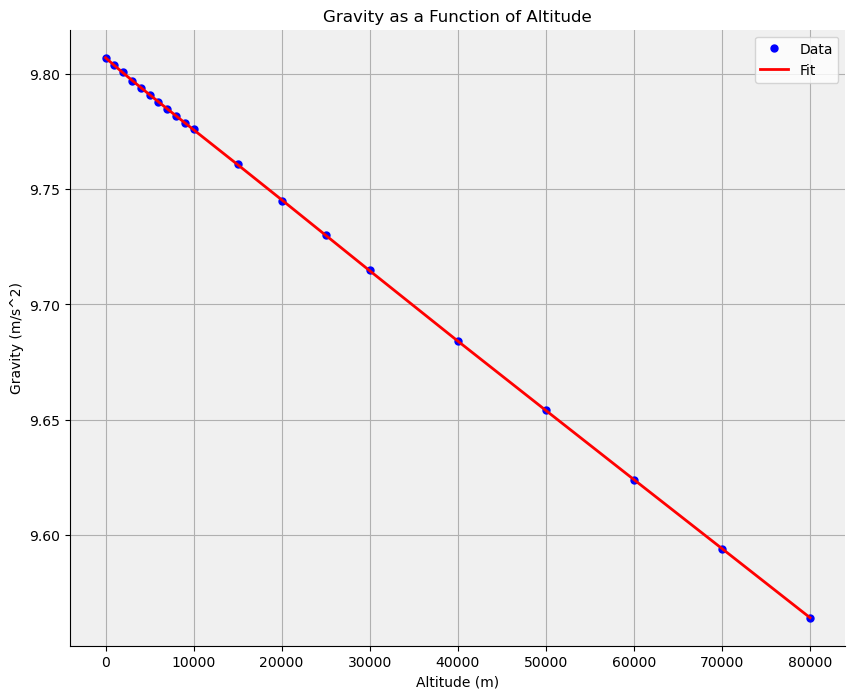

In [38]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction_combined(altitude[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])
    
print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(altitude,np.abs(yfit),color='r', linewidth=2, label = "Fit")

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
#plt.yscale("log")
plt.legend()